<a href="https://colab.research.google.com/github/Madmanz2/Image-Modification-Peter/blob/feedback/FamilyGuyDoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Pics

/content/drive/MyDrive/Pics


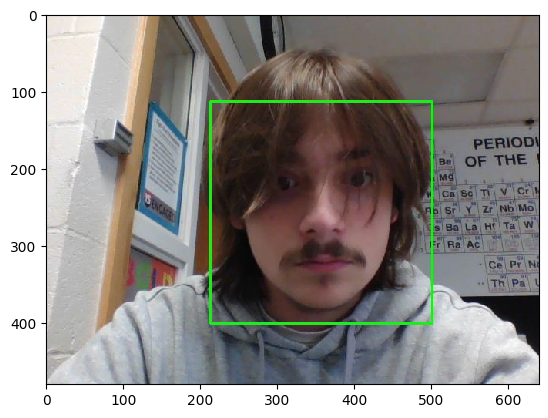

In [6]:

%matplotlib inline
import PIL
import cv2
import os
import matplotlib.pyplot as plt
import PIL.ImageDraw
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import math

directory = os.getcwd()
filename_base = os.path.join(directory, 'photo_detected.jpg')
img = np.array(Image.open(filename_base))
fig, ax = plt.subplots(1, 1)
ax.imshow(img, interpolation='none')
fig.show()


In [7]:
import cv2
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [29]:
def takeaphoto():
  from IPython.display import Image
  try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

In [36]:
def greenscreenface():
  import cv2

  # Load the image
  image_path = "photo.jpg"
  image = cv2.imread(image_path)

  from google.colab.patches import cv2_imshow
  import cv2

  # Load the image
  image_path = "photo.jpg"
  image = cv2.imread(image_path)

  # Check if the image is loaded successfully
  if image is None:
      print("Error: Could not open or find the image.")
  else:
      # Resize the image
      desired_width = 400
      aspect_ratio = image.shape[1] / image.shape[0]
      desired_height = int(desired_width / aspect_ratio)
      resized_image = cv2.resize(image, (desired_width, desired_height))

      # Convert the image to grayscale
      gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

      # Apply GaussianBlur to the grayscale image
      blur = cv2.GaussianBlur(gray, (5, 5), 0)

      # Set a threshold to segment the person
      blk_thresh = 100
      _, threshold_img = cv2.threshold(blur, blk_thresh, 255, cv2.THRESH_BINARY)

      # Invert the threshold image to create a mask
      mask = 255 - threshold_img

      # Apply the mask to the original image
      result = cv2.bitwise_and(resized_image, resized_image, mask=mask)

      # Display the original and modified images
      cv2_imshow(result)

      # Save the modified image
      output_path = "modified_photo.png"
      cv2.imwrite(output_path, result)

      cv2.waitKey(0)
      cv2.destroyAllWindows()

In [13]:
img = cv2.imread('photo.jpg')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") #Note the change
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_img,1.1,4)


print(f"{len(faces)} faces detected in the image.")

1 faces detected in the image.


In [17]:
for x,y,width,height in faces:
  cv2.imwrite("photo_detected.jpg",img)

In [39]:
charlist = ['brian', 'meg','peter','chris','stew','los','omni', 'your face' ]
def peterdoor():
  %matplotlib inline
  import PIL
  import os
  import matplotlib.pyplot as plt
  import PIL.ImageDraw
  from PIL import Image, ImageDraw, ImageFont
  import numpy as np
  import math

  print(charlist)
  userc = input("What Character do you want to be greeted?: ")
  if userc == 'brian':
    GreenScreenFile = Image.open('brian.jpg')
  if userc == 'meg' :
    GreenScreenFile = Image.open('meg.jpg')
  if userc == 'peter':
    GreenScreenFile = Image.open('peter.jpg')
  if userc == 'chris':
    GreenScreenFile = Image.open('chris.jpg')
  if userc == 'stew':
    GreenScreenFile = Image.open('stew.jpg')
  if userc =='los':
    GreenScreenFile = Image.open('los.jpg')
  if userc =='omni':
    GreenScreenFile = Image.open('omni.jpg')
  if userc == 'your face':
    takeaphoto()
    greenscreenface()
    GreenScreenFile = Image.open('modified_photo.png')




  # open green screen image in PIL
  GreenScreen = GreenScreenFile.convert("RGBA")
  pixdata = GreenScreen.load()
  width, height = GreenScreen.size

  # COPY AND PASTE YOUR CODE THAT MADE YOUR ALPHA CHANNEL TRANSPARENT HERE FROM THE PREVIOUS CODE CELL
  # JUST THE CODE BLOCK THAT STARTS WITH FOR Y IN RANGE (HEIGHT)

  for y in range(height):
      for x in range(width):
          #MODIFY THE IF STATEMENT TO INCLUDE CONDITIONALS (>,<) TO SELECT FOR GREEN PIXELS (Remember: (R,G,B,A))
          if pixdata[x,y][0]  <150    and pixdata[x,y][1] >150      and pixdata[x,y][2] <150    :
                pixdata[x, y] = (0,0,0,0)
          if pixdata[x,y][0]  <5    and pixdata[x,y][1] <5      and pixdata[x,y][2] <5    :
                pixdata[x, y] = (0,0,0,0)








  GreenScreen.save("greenscreen_modified.png", "PNG")
  Background = Image.open('a9f (1).png')





  GreenScreen= GreenScreen.resize((500, 350))
  Background.paste(GreenScreen, (-50, 50), mask=GreenScreen)


  # Display Image
  Background.save("output.png")
  fig, ax = plt.subplots(1, 1)
  directory = os.getcwd()
  filename_greenscreen = os.path.join(directory, 'output.png')
  img = np.array(Image.open(filename_greenscreen))
  ax.imshow(img, interpolation='none')
  fig.show()


['brian', 'meg', 'peter', 'chris', 'stew', 'los', 'omni', 'your face']
What Character do you want to be greeted?: your face


<IPython.core.display.Javascript object>

Saved to photo.jpg


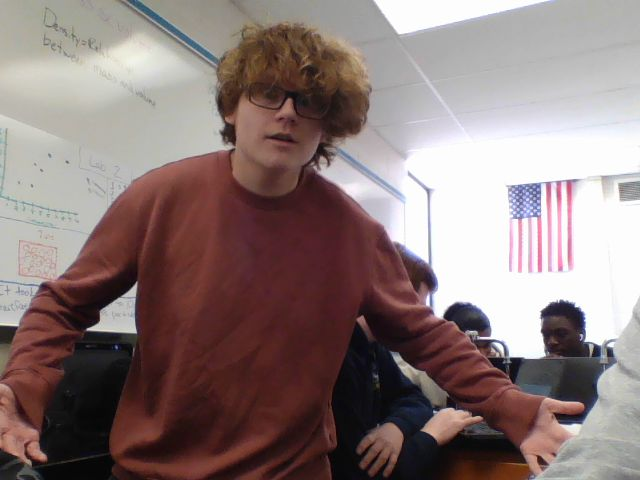

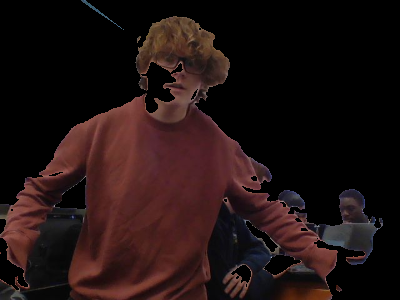

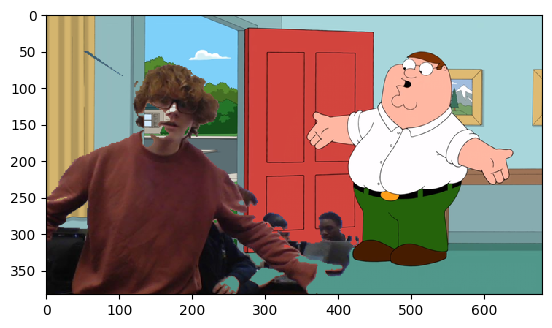

In [44]:
peterdoor()